In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract


# Original Images

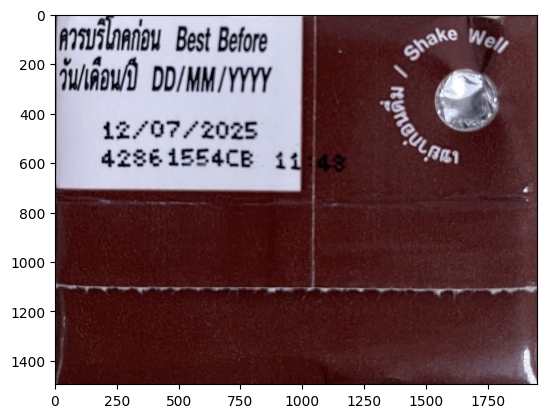

In [33]:
# # Let's load a simple image with 3 black squares 
image = cv2.imread('../data/small/IMG_E0103_zoomed.jpg')
cv2.waitKey(0)
 
plt.imshow(image[:,:,::-1])

(1495, 1950)


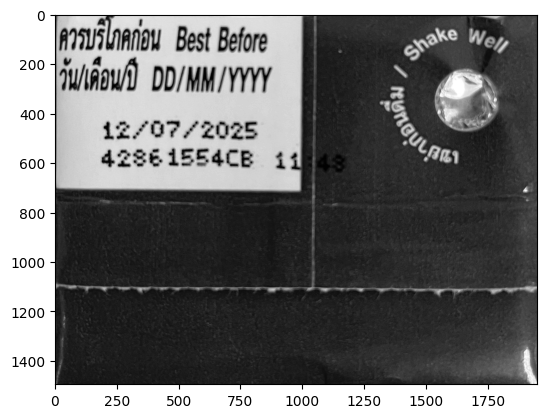

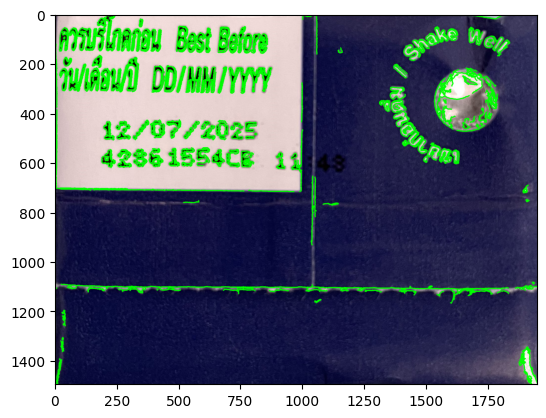

In [34]:
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')
plt.show()

edged = cv2.Canny(gray, 30, 200)
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
plt.imshow(image, cmap='gray')
# gray to binary
# _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     if w > 50 and h > 50:
#         roi = gray[y:y + h, x:x + w]
#         text = pytesseract.image_to_string(roi)
#         print(text)


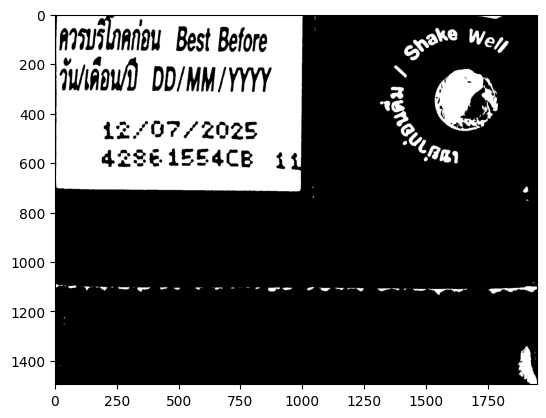

In [35]:
binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(binary_image, cmap='gray')
plt.show()

In [36]:
# #Optional: Invert the image to make text black on white background for better OCR results
# inverted_image = cv2.bitwise_not(binary_image)

# Optional: Crop the image to reduce the size of the image
cut_inverted_image = binary_image[0:binary_image.shape[0]//2 - 50, 10:binary_image.shape[1]//2]

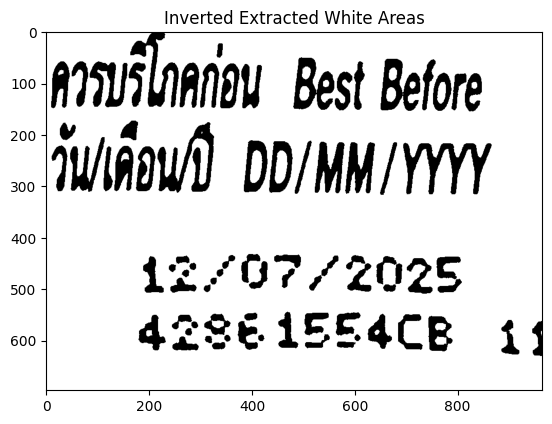

In [37]:
# Step 4: Apply morphological operations to refine the shapes
kernel = np.ones((2, 2), np.uint8)
morph_image = cv2.morphologyEx(cut_inverted_image, cv2.MORPH_CLOSE, kernel, iterations=1)

# Optional: Additional dilation and erosion to make text more uniform
dilated_image = cv2.dilate(morph_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# Step 5: Invert the image back if needed (black text on white)
# final_image = cv2.bitwise_not(eroded_image)

# Use Tesseract to extract text from the isolated white areas
extracted_text = pytesseract.image_to_string(eroded_image, lang='eng+tha')  # Add languages as needed

# Optionally, display the extracted white areas for verification
plt.imshow(eroded_image, cmap='gray')
plt.title("Inverted Extracted White Areas")
plt.show()

In [38]:
# Display the extracted text
print("Extracted Text:")
output_text = extracted_text.split('\n')

# delete empty string
output_text = [x for x in output_text if x != '']
print(output_text)

Extracted Text:
['ย า ร ร เค ก อ น Best Before', 'qwingw’) DD/MM/YYYY', '12/07/2025', '4296155408 11']


In [39]:
# defect detection
if len(output_text) != 4:
    print("Defect detected")